In [13]:
import sys
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

sys.path.append("../")
import GSHEWaveform


%load_ext autoreload
%autoreload 2
# %matplotlib notebook
%matplotlib inline
tosave = True
fout = "/Users/richard/Downloads/"
fout = "/home/miguel/code/notebooks/GSHE/plots/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


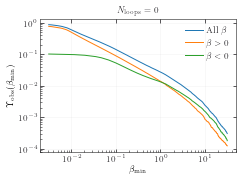

In [19]:
plt.figure()
plt.title(r"$N_{\rm loops} = 0$")
plt.plot(betalims, ups_unsign, label=r"All $\beta$")#MZ: changed ups->ups_unsign
plt.plot(betalims, ups_plus, label=r"$\beta > 0$")
plt.plot(betalims, ups_minus, label=r"$\beta < 0$")


plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.tight_layout()
# plt.savefig("/Users/richard/Downloads/res.png", dpi=300)
plt.show()

# Sign dependence of $\Upsilon_{\rm src}$

Eliminating 147 point due to beta with average 0.9592 loops.


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:112: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))  # Area element in spherical coords


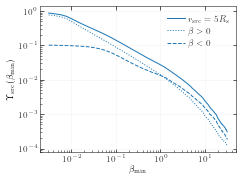

In [14]:
def get_beta(run):
    data = GSHEWaveform.read_shooting(run, "../data", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    return data, betas


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
GSHEWaveform.setmplstyle("../plot_style.txt")
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $\mathrm{sign}(\beta)$")
for i, run in enumerate([13]): #, 15]):
    data, betas = get_beta(run)
    ups_unsign = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0])
    ups_plus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=1)
    ups_minus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=-1)
    plt.plot(betalims, ups_unsign, c=cols[i],
             label=r"$r_{{\rm src}} = {} R_{{\rm s}}$".format(dists[run]))
    plt.plot(betalims, ups_plus, c=cols[i], ls="dotted",
             label=r"$\beta > 0$")
    plt.plot(betalims, ups_minus, c=cols[i], ls="dashed",
             label=r"$\beta < 0$")




plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm src}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()

if tosave:
    plt.savefig(join(fout, "ups_source.pdf"), dpi=450)
plt.show()

Eliminating 147 point due to beta with average 0.9592 loops.


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:217: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


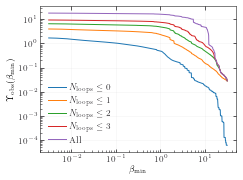

In [15]:
def get_beta_mu(run):
    data = GSHEWaveform.read_shooting(run, "../data", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    
    mu = np.abs(data["Xgeo"][:, 8])
    hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
    mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)

    return data, betas, mu


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
ls = ["solid", "dotted"]
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
data, betas, mu = get_beta_mu(13)
GSHEWaveform.setmplstyle("../plot_style.txt")
for j, nloop_max in enumerate([0, 1, 2, 3, None]):
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], nloop_max=nloop_max)
    label=r"$N_{{\rm loops}} \leq {}$".format(nloop_max) if nloop_max is not None else "All"
    plt.plot(betalims, ups,label=label, c=cols[j])

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_loops.pdf"), dpi=450)
plt.show()

Eliminating 147 point due to beta with average 0.9592 loops.


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:217: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


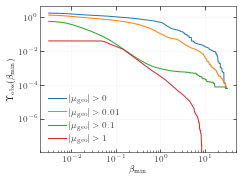

In [29]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)


mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)

GSHEWaveform.setmplstyle("../plot_style.txt")
plt.figure()
for th in [0, 0.01, 0.1, 1]:
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0)
    plt.plot(betalims, ups, label=r"$|\mu_{{\rm geo}}| > {}$".format(th))


plt.xscale("log")
plt.yscale("log")
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_magnif.pdf"), dpi=450)
plt.show()

In [28]:
np.sqrt(0.1), np.sqrt(0.05)

(0.31622776601683794, 0.22360679774997896)

In [49]:
#store as a function of the minimum magnification

mu_min_arr = np.geomspace(1e-3,1e2,50)

ups_obs_arr = []

for mu_min in mu_min_arr:
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=mu_min, nloop_max=0)
    print(mu_min)
    ups_obs_arr.append(ups)

/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:217: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


0.001
0.0012648552168552957
0.0015998587196060573
0.0020235896477251575
0.002559547922699536
0.0032374575428176433
0.004094915062380427
0.005179474679231213
0.006551285568595509
0.008286427728546842
0.010481131341546858
0.013257113655901095
0.016768329368110083
0.021209508879201904
0.02682695795279726
0.0339322177189533
0.04291934260128778
0.054286754393238594
0.06866488450043001
0.08685113737513529
0.10985411419875583
0.13894954943731375
0.1757510624854793
0.22229964825261955
0.28117686979742307
0.35564803062231287
0.4498432668969444
0.5689866029018299
0.7196856730011522
0.9102981779915218
1.151395399326448
1.4563484775012443
1.8420699693267164
2.329951810515372
2.9470517025518097
3.7275937203149416
4.714866363457395
5.963623316594643
7.543120063354623
9.540954763499943
12.067926406393289
15.264179671752334
19.306977288832496
24.420530945486497
30.88843596477485
39.06939937054621
49.417133613238384
62.50551925273976
79.06043210907701
100.0


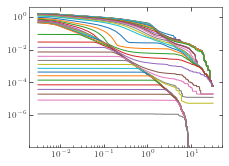

In [38]:
ups_obs_arr = np.array(ups_obs_arr)
for i,mu_min in enumerate(mu_min_arr):
    plt.loglog(betalims,ups_obs_arr[i,:],label='%g'%mu_min)
    
# plt.legend()

<ipython-input-64-da753e9a3081>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


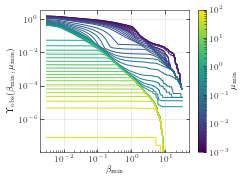

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

ups_obs_arr = np.array(ups_obs_arr)


fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i, mu_min in enumerate(mu_min_arr):
    line, = ax.loglog(betalims, ups_obs_arr[i, :], c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')



ax.set_ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$")
ax.set_xlabel(r"$\beta_{\rm min}$")

# ax.legend()
# plt.show()
ax.grid(alpha=0.3)
fig.tight_layout()
if tosave:
    fig.savefig(join(fout, "ups_obs_magnif_many.pdf"), dpi=450)

In [58]:
#save file
data_dict = {"betalims": betalims, "mu_min_arr": mu_min_arr, "ups_obs_arr": ups_obs_arr}
header = " ".join(data_dict.keys())
np.save("../data/Ups_obs_mu_min", data_dict, allow_pickle=True)